In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

**Read In The Data (Drop Unused Variables)**

In [2]:
data = pd.read_excel('../Data/ProcessedData/TMDB_processed.xlsx')
data = data.drop(['title', 'revenue', 'budget'], axis=1) # Using log revenue and log budget

**Define Optimal Features (Selected using RFECV)**

In [3]:
optimal_features = ['release_date', 'popularity', 'id', 'runtime', 'cast_average', 'crew_average', 'Jr. ', 'Frank Welker ', 'Samuel L. Jackson ', 'Liam Neeson ', 'Robert De Niro ', 'Bruce Willis ', 'Nicolas Cage ', 'Morgan Freeman ', 'Willem Dafoe ', 'John Goodman ', 'Steve Buscemi ', 'Matt Damon ', 'Sylvester Stallone ', 'Bess Flowers ', 'Stanley Tucci ', 'Johnny Depp ', 'Richard Jenkins ', 'J.K. Simmons ', 'Alec Baldwin ', 'Julianne Moore ', 'Keith David ', 'Dennis Quaid ', 'Robert Downey Jr. ', 'Harrison Ford ', 'Tom Hanks ', 'Bill Murray ', 'Christopher Walken ', 'Brad Pitt ', 'Thomas Rosales Jr. ', 'John Hurt ', 'John Leguizamo ', 'Paul Giamatti ', 'Robert Duvall ', 'Susan Sarandon ', 'Nicole Kidman ', 'Michael Caine ', 'Ben Stiller ', 'Robin Williams ', 'Gene Hackman ', 'Denzel Washington ', 'Alfred Molina ', 'Ben Kingsley ', 'Mickie McGowan ', 'Woody Harrelson ', 'Dustin Hoffman ', 'Meryl Streep ', 'Brian Cox ', 'Ewan McGregor ', 'Harry Dean Stanton ', 'Forest Whitaker ', 'Jeff Bridges ', 'Stephen Root ', 'Laurence Fishburne ', 'Kevin Costner ', 'Danny Glover ', 'Joe Chrest ', 'Tommy Lee Jones ', 'Clint Eastwood ', 'Shah Rukh Khan ', 'Michael Papajohn ', 'Antonio Banderas ', 'James Franco ', 'Ben Affleck ', 'Donald Sutherland ', 'Tom Cruise ', 'Owen Wilson ', 'Scarlett Johansson ', 'James Earl Jones ', 'Cate Blanchett ', 'Anthony Hopkins ', 'Colin Farrell ', 'John Cusack ', 'Dan Aykroyd ', 'Stan Lee ', 'Kathy Bates ', 'Bill Hader ', 'Jim Broadbent ', 'Gary Oldman ', 'John Turturro ', 'Keanu Reeves ', 'Brendan Gleeson ', 'Christopher Plummer ', 'Bruce Greenwood ', 'Harvey Keitel ', 'Stephen Tobolowsky ', 'Sigourney Weaver ', 'Fred Tatasciore ', 'Helen Mirren ', 'Bob Bergen ', 'Jack Black ', 'Michael Shannon ', 'John C. Reilly ', 'Matthew McConaughey ', 'Mel Gibson ', 'Dwayne Johnson ', 'John Malkovich ', 'Mark Wahlberg ', 'Bill Nighy ', 'John Cleese ', 'Danny DeVito ', 'James Hong ', 'Xander Berkeley ', 'Will Ferrell ', 'Julia Roberts ', 'Clint Howard ', 'William H. Macy ', 'John Travolta ', 'M. Emmet Walsh ', 'Don Cheadle ', 'Stellan Skarsgård ', 'Allison Janney ', 'Whoopi Goldberg ', 'Jack Angel ', 'Octavia Spencer ', 'Naomi Watts ', 'Philip Baker Hall ', 'Nick Nolte ', 'Danny Trejo ', 'Bruce McGill ', 'Anthony Mackie ', 'Michelle Pfeiffer ', 'Jason Statham ', 'Ralph Fiennes ', 'Michael Gambon ', 'Jess Harnell ', 'Eddie Murphy ', 'Elizabeth Banks ', 'Eddie Marsan ', 'John Lithgow ', 'Tom Wilkinson ', 'Adam Sandler ', 'Arthur Tovey ', 'Kevin Spacey ', 'Ethan Hawke ', 'Gwyneth Paltrow ', 'Emma Thompson ', 'Jim Cummings ', 'Wallace Shawn ', 'Philip Seymour Hoffman ', 'Oliver Platt ', 'Hugh Jackman ', 'Mark Strong ', 'Richard Gere ', 'Luis Guzmán ', 'Kevin Bacon ', 'Bert Stevens ', 'Mark Ruffalo ', 'William Hurt ', 'David Thewlis ', 'Toby Jones ', 'Jeff Goldblum ', 'John Ratzenberger ', 'Sherry Lynn ', 'Laraine Newman ', 'Jude Law ', 'Kevin Dunn ', 'James Remar ', 'Diane Keaton ', 'Eugene Levy ', 'Patrick Stewart ', 'Rance Howard ', 'Halle Berry ', 'Ed Harris ', 'Jackie Chan ', 'Jonah Hill ', 'Jeffrey Tambor ', 'Arnold Schwarzenegger ', 'Steve Zahn ', 'Christian Slater ', 'Christopher McDonald ', 'Alan Arkin ', 'Paul Rudd ', 'Tilda Swinton ', 'Jon Favreau ', 'Michael Douglas ', 'Bill Paxton ', 'Ciarán Hinds ', 'Charlize Theron ', 'Sandra Bullock ', 'Christian Bale ', 'Ving Rhames ', 'Drew Barrymore ', 'Ryan Reynolds ', 'George Clooney ', 'Peter Stormare ', 'Sean Connery ', 'Channing Tatum ', 'Mike Starr ', 'Lin Shaye ', 'Colleen Camp ', 'Dennis Hopper ', 'Burt Reynolds ', 'Josh Brolin ', 'Seth Rogen ', 'James Cromwell ', 'Michael Keaton ', 'Judi Dench ', 'Jason Bateman ', 'Cameron Diaz ', 'Diane Lane ', 'Dan Hedaya ', 'Martin Sheen ', 'Michael Peña ', 'John Franchi ', 'Andy García ', 'Val Kilmer ', 'Ray Liotta ', 'Anjelica Huston ', 'David Koechner ', 'Dermot Mulroney ', 'James Woods ', 'Natalie Portman ', 'Bradley Cooper ', 'Idris Elba ', 'Alan Tudyk ', 'Maggie Smith ', 'Jason Isaacs ', 'Catherine Keener ', 'Steve Carell ', 'Frances McDormand ', 'Joan Cusack ', 'Kristen Wiig ', 'Kevin Hart ', 'Kirsten Dunst ', 'Queen Latifah ', 'Jon Voight ', 'Richard Schiff ', 'Chris Rock ', 'Chris Cooper ', 'Vince Vaughn ', 'Pierce Brosnan ', 'Billy Bob Thornton ', 'Rachel Weisz ', 'Jim Carrey ', 'Rosario Dawson ', 'Justin Long ', 'Margo Martindale ', 'Steve Martin ', 'Elias Koteas ', 'Patricia Clarkson ', 'Luke Wilson ', "William H. O'Brien ", 'Angela Bassett ', 'Kurt Russell ', 'Timothy Spall ', 'Danny Mann ', 'Dylan Baker ', 'Clancy Brown ', 'Cheech Marin ', 'Toni Collette ', 'Jeff Daniels ', 'Tony Shalhoub ', 'Terrence Howard ', 'Salma Hayek ', 'Will Patton ', 'Robert Patrick ', 'Joe Pantoliano ', 'Tracey Walter ', 'Christopher Lloyd ', 'Liev Schreiber ', 'Jared Harris ', 'Mark Margolis ', 'Paul Herman ', 'Marisa Tomei ', 'Vin Diesel ', 'Robert Redford ', 'Ken Jeong ', 'Max von Sydow ', 'Benicio del Toro ', 'Bruce Fowler ', 'Matthew Harrison ', 'Tim Burton ', 'Chris Lebenzon ', 'Chris Columbus ', 'Philip Rogers ', 'David Crone ', 'Susan Dudeck ', 'Bob Beemer ', 'David Giammarco ', 'David Bach ', 'Roy Lee ', 'Duane Manwiller ', 'Jack Stew ', 'Allison Jones ', 'Robert Deschaine ', 'Steven Kirshoff ', 'Douglas Aibel ', 'Eric Gotthelf ', 'Paul Urmson ', 'Scott Sanders ', 'Laura Rosenthal ', 'Avi Lerner ', 'Henry Mancini ', 'Anurag Kashyap ', 'Josh McLaglen ', 'William B. Kaplan ', 'David C. Hughes ', 'Michael Giacchino ', 'Don Burgess ', 'Frederick H. Stahly ', 'Matt Curtis ', 'Craig Hosking ', 'Sam Raimi ', 'Patrick Tatopoulos ', 'Piero Mura ', 'Mel Metcalfe ', 'Sarah Katzman ', 'Lee Dichter ', 'Heike Brandstatter ', 'Jack English ', 'Stephen Hunter Flick ', 'Juel Bestrop ', 'Dennis McNeill ', 'Theresa Repola Mohammed ', 'Dino De Laurentiis ', 'Liza Chasin ', 'Ed Shearmur ', 'Kevin Smith ', 'Julie Feiner ', 'Jon Taylor ', 'Christopher T. Welch ', 'Lucy Bevan ', 'Brian Avery ', 'Michael Babcock ', 'Dottie Starling ', 'Donah Bassett ', 'Gary Jones ', 'Akiva Goldsman ', 'David E. Campbell ', 'Melinda Sue Gordon ', 'M. Night Shyamalan ', 'Juno J. Ellis ', 'Peter Afterman ', 'Vic Armstrong ', 'Aaron Glascock ', 'James Matheny ', 'Adam McKay ', 'Robert Fernandez ', 'Jennifer L. Smith ', 'Don Carmody ', 'Judd Apatow ', 'Yoram Globus ', 'Richard Hymns ', 'Ben Burtt ', 'J.J. Abrams ', 'Edouard F. Henriques ', 'Peter Jackson ', 'François Duhamel ', 'Tom Ozanich ', 'Teri E. Dorman ', 'Merrick Morton ', 'Lauren Shuler Donner ', 'Mark Taylor ', 'Marc Fishman ', 'David Jobe ', 'Douglas Murray ', 'James Bolt ', 'Jackie Burch ', 'Michael Mann ', 'Mychael Danna ', 'Tim Walston ', 'Curt Schulkey ', 'Gregory Lundsgaard ', 'Maurice Jarre ', 'Tim Chau ', 'Aaron Zigman ', 'Marion Dougherty ', 'Peter Farrelly ', 'Mark Irwin ', 'Boaz Davidson ', 'Richard Linklater ', 'Pedro Almodóvar ', 'Frank Rinella ', 'Dylan Goss ', 'Colin Anderson ', 'Ren Klyce ', 'Mike Prestwood Smith ', 'Jeffrey J. Haboush ', 'Rosemary Brandenburg ', 'Dean A. Zupancic ', 'Marilyn McCoppen ', 'Brad Martin ', 'Mike Smith ', 'Gillian Dodders ', 'Clayton Townsend ', 'Susan Dawes ', 'Robert J. Litt ', 'Lindsay Graham ', 'Mildred Iatrou ', 'David Boulton ', 'Bob Baron ', 'Joel Cox ', 'Kathy Nelson ', 'Michael Tronick ', 'Paul Hsu ', 'Steve Pederson ', 'Sydney Pollack ', 'Kirsten Errington ', 'Jack Giarraputo ', 'Peter Hyams ', 'Tomoyuki Tanaka ', 'Juan Peralta ', 'Marshall Winn ', 'Shelley Roden ', 'J. Michael Muro ', 'Brian N. Bentley ', 'Simon Kinberg ', 'Michael J. Broomberg ', 'Karen Baker Landers ', 'Joe Roth ', 'Hamilton Sterling ', 'Will Arnot ', 'Thomas Jones ', 'Shay Cunliffe ', 'Jay Wilkinson ', 'Debbie Evans ', 'Chris Carpenter ', 'Robert Elswit ', 'Tami Treadwell ', 'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Drama', 'Romance', 'Thriller', 'Family', 'Animation', 'Crime', 'Comedy', 'Mystery', 'Music', 'History', 'War', 'Horror', 'Western', 'Documentary', 'TV Movie', 'Warner Bros. Pictures', 'Universal Pictures', 'Paramount', '20th Century Fox', 'Columbia Pictures', 'Metro-Goldwyn-Mayer', 'New Line Cinema', 'Walt Disney Pictures', 'Canal+', 'Touchstone Pictures', 'United Artists', 'Miramax', 'TriStar Pictures', 'Lionsgate', 'StudioCanal', 'Relativity Media', 'Sony Pictures', 'DreamWorks Pictures', 'Village Roadshow Pictures', 'Regency Enterprises', 'Fox Searchlight Pictures', 'Working Title Films', 'Amblin Entertainment', 'Focus Features', 'Toho Co.', 'Orion Pictures', 'Summit Entertainment', 'Dimension Films', 'BBC Films', 'Dune Entertainment', 'Film4 Productions', 'Screen Gems', 'France 2 Cinéma', 'Imagine Entertainment', 'CJ Entertainment', 'TF1 Films Production', 'TSG Entertainment', 'Fox 2000 Pictures', 'Hollywood Pictures', 'The Weinstein Company', 'Ciné+', 'Blumhouse Productions', 'New Regency Pictures', 'Ingenious Media', 'Legendary Pictures', 'Constantin Film', 'Castle Rock Entertainment', 'Scott Rudin Productions', 'Silver Pictures', 'Participant', 'original_language_af', 'original_language_ar', 'original_language_az', 'original_language_be', 'original_language_bg', 'original_language_bn', 'original_language_ca', 'original_language_cn', 'original_language_cs', 'original_language_da', 'original_language_de', 'original_language_el', 'original_language_en', 'original_language_es', 'original_language_et', 'original_language_fa', 'original_language_fi', 'original_language_fr', 'original_language_gl', 'original_language_he', 'original_language_hi', 'original_language_hu', 'original_language_id', 'original_language_it', 'original_language_iu', 'original_language_ja', 'original_language_ka', 'original_language_kn', 'original_language_ko', 'original_language_la', 'original_language_mk', 'original_language_ml', 'original_language_mn', 'original_language_mr', 'original_language_ms', 'original_language_nb', 'original_language_ne', 'original_language_nl', 'original_language_no', 'original_language_pa', 'original_language_pl', 'original_language_pt', 'original_language_ro', 'original_language_ru', 'original_language_si', 'original_language_sk', 'original_language_sv', 'original_language_ta', 'original_language_te', 'original_language_th', 'original_language_tl', 'original_language_tr', 'original_language_uk', 'original_language_ur', 'original_language_vi', 'original_language_zh', 'log_budget']

**Separate Features and Target Variable**

In [4]:
X = data[optimal_features] # After RFECV
y = data['log_revenue']

**Split Data into Test and Train (90/10 Split)**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**<font size="5">Extreme Gradient Boosted Regression</font>**

**XGBRegressor Tuned for Normalized Budget and Target Variable**

In [7]:
# Log Revenue
regressor = XGBRegressor(colsample_bytree=0.6, gamma=0.3, max_depth=4, min_child_weight=5, n_estimators=300,
                         subsample=0.8, objective='reg:squarederror')
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

**<font size="5">Random Forest Regression</font>**

**Tuned RandomForestRegressor**

In [8]:
# regressor = RandomForestRegressor(bootstrap=False, max_depth=70, max_features=sqrt, 
#                                   min_samples_leaf=1, n_estimators=53)
# regressor.fit(X_train, y_train)
# y_predictions = regressor.predict(X_test)

**<font size="5">Score Models</font>**

**Score Model (R-Squared) and Plot Predicted vs. True Data**

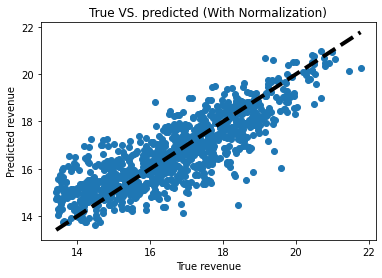

R2 score: 0.694942291353985


In [9]:
score = r2_score(y_test, y_predictions)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True revenue')
ax.set_ylabel('Predicted revenue')
plt.title('True VS. predicted (With Normalization)') 
plt.show()

print('R2 score: {}'.format(score))